# How are in-demand skills trending for Data Engineer

In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_India = df[(df.job_title_short == 'Data Engineer') & (df.job_country == 'India')].copy()

In [6]:
df_DA_India['job_posted_month_no'] = df_DA_India['job_posted_date'].dt.month

In [8]:
df_DA_India_explode = df_DA_India.explode('job_skills')

In [20]:
df_DA_India_pivot = df_DA_India_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_India_pivot.loc['Total'] = df_DA_India_pivot.sum()

df_DA_India_pivot = df_DA_India_pivot[df_DA_India_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_India_pivot = df_DA_India_pivot.drop('Total')

df_DA_India_pivot

job_skills,sql,python,spark,aws,azure,java,hadoop,scala,databricks,kafka,...,delphi,ggplot2,asp.net core,electron,solidity,dplyr,symfony,mlpack,sqlserver,heroku
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1459,1320,834,759,765,470,501,419,372,406,...,0,0,1,0,0,0,0,1,0,0
2,1133,994,655,582,553,385,424,303,280,320,...,0,0,0,0,0,0,0,0,1,0
3,1073,980,615,592,527,349,312,294,290,320,...,0,0,0,0,0,0,0,0,0,0
4,1072,926,614,567,522,358,329,280,283,310,...,0,0,0,0,0,1,0,0,0,0
5,915,829,548,514,468,294,297,265,256,281,...,1,0,0,0,0,0,0,0,0,0
6,1116,974,644,602,596,336,338,343,304,318,...,0,0,0,0,0,0,0,0,0,0
7,1052,901,527,569,593,291,287,278,267,264,...,0,0,0,1,0,0,0,0,0,0
8,935,798,510,534,485,287,271,272,256,269,...,0,1,0,0,1,0,0,0,0,0
9,996,886,509,529,533,306,299,315,290,265,...,0,0,0,0,0,0,1,0,0,0


In [22]:
DA_totals = df_DA_India.groupby('job_posted_month_no').size()

In [29]:
df_DA_India_percent = df_DA_India_pivot.div(DA_totals/100, axis=0)

change from month_no to month_name 

In [30]:
df_DA_India_percent = df_DA_India_percent.reset_index()
df_DA_India_percent ['job_posted_month'] = df_DA_India_percent ['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m' ).strftime('%b'))
df_DA_India_percent = df_DA_India_percent.set_index('job_posted_month')
df_DA_India_percent = df_DA_India_percent.drop(columns='job_posted_month_no')

df_DA_India_percent

job_skills,sql,python,spark,aws,azure,java,hadoop,scala,databricks,kafka,...,delphi,ggplot2,asp.net core,electron,solidity,dplyr,symfony,mlpack,sqlserver,heroku
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,68.433396,61.913696,39.118199,35.600375,35.881801,22.045028,23.499062,19.652908,17.448405,19.043152,...,0.000000,0.000000,0.046904,0.000000,0.000000,0.000000,0.000000,0.046904,0.000000,0.000000
Feb,69.466585,60.944206,40.159411,35.683630,33.905579,23.605150,25.996321,18.577560,17.167382,19.619865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061312,0.000000
Mar,67.441860,61.596480,38.654934,37.209302,33.123821,21.935889,19.610308,18.478944,18.227530,20.113136,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,68.454662,59.131545,39.208174,36.206897,33.333333,22.860792,21.008940,17.879949,18.071520,19.795658,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.063857,0.000000,0.000000,0.000000,0.000000
May,66.112717,59.898844,39.595376,37.138728,33.815029,21.242775,21.459538,19.147399,18.497110,20.303468,...,0.072254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,68.382353,59.681373,39.460784,36.887255,36.519608,20.588235,20.710784,21.017157,18.627451,19.485294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,68.848168,58.965969,34.489529,37.238220,38.808901,19.044503,18.782723,18.193717,17.473822,17.277487,...,0.000000,0.000000,0.000000,0.065445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,66.453447,56.716418,36.247335,37.953092,34.470505,20.398010,19.260839,19.331912,18.194741,19.118692,...,0.000000,0.071073,0.000000,0.000000,0.071073,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,66.047745,58.753316,33.753316,35.079576,35.344828,20.291777,19.827586,20.888594,19.230769,17.572944,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066313,0.000000,0.000000,0.000000


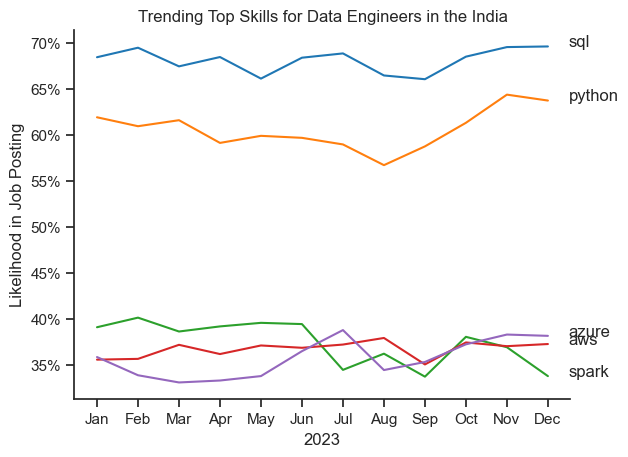

In [45]:
df_plot = df_DA_India_percent.iloc[:,:5]

sns.lineplot(data=df_plot, dashes= False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('Trending Top Skills for Data Engineers in the India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt. legend().remove()

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.5,df_plot.iloc[-1,i], df_plot.columns[i])
